In [7]:
import pandas as pd

/Users/zameershaik/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zameershaik/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
df = pd.read_csv('US_Heart_patients.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
df.fillna(method='ffill',inplace=True)

In [12]:
df.shape

(4240, 16)

In [13]:
# statistical model using OLS

In [14]:
import statsmodels.api as sm

/Users/zameershaik/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
x= df.drop(columns='TenYearCHD')
y=df['TenYearCHD']

In [13]:
x_const = sm.add_constant(x)
olsmodel = sm.Logit(y,x_const).fit()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.1107
Time:                        21:45:05   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [ ]:
# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(x_train,y_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# y_pred 
ytrain_pred = logmodel.predict(x_train)

In [34]:
#y_prob
ytrain_prob = logmodel.predict_proba(x_train)[:,1]

In [35]:
# model evaluation
ytest_pred = logmodel.predict(x_test)
ytest_prob = logmodel.predict_proba(x_test)[:,1]

In [27]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [29]:
confusion_matrix(y_train,ytrain_pred)

array([[2519,    9],
       [ 426,   14]])

In [30]:
accuracy_score(y_train,ytrain_pred)

0.8534366576819407

In [32]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2528
           1       0.61      0.03      0.06       440

    accuracy                           0.85      2968
   macro avg       0.73      0.51      0.49      2968
weighted avg       0.82      0.85      0.79      2968



In [36]:
roc_auc_score(y_train,ytrain_prob)

0.6703178941311853

In [37]:
fpr,tpr,tresh = roc_curve(y_train,ytrain_prob)

In [38]:
import matplotlib.pyplot as plt

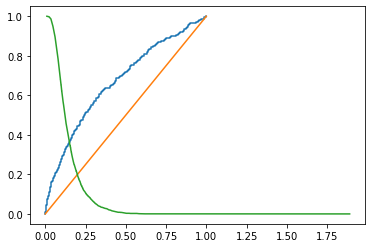

In [41]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(tresh,fpr)

In [42]:
accuracy_score(y_test,ytest_pred)

0.8443396226415094

In [43]:
roc_auc_score(y_test,ytest_prob)

0.649505214070647

In [44]:
# Decision Tree


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtc = DecisionTreeClassifier()

In [48]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
ytrain_pred = dtc.predict(x_train)
ytrain_prod = dtc.predict_proba(x_train)[:,1]

In [ ]:
DecisionTreeClassifier()

In [68]:
accuracy_score(y_train,ytrain_pred)

0.85411051212938

In [69]:
roc_auc_score(y_train,ytrain_prob)

0.6703178941311853

In [67]:
ytest_pred = dtc.predict(x_test)
ytest_prod = dtc.predict_proba(x_test)[:,1]

In [70]:
accuracy_score(y_test,ytest_pred)

0.8364779874213837

In [54]:
roc_auc_score(y_test,ytest_prob)

0.649505214070647

In [55]:
# Hyper Parameter tuning

In [57]:
params ={  'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,12),
    'min_samples_split':range(1,15),
    'min_samples_leaf':range(1,5)}

In [58]:
#grid search cv and randomizes search cv

In [59]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [61]:
gsv = GridSearchCV(dtc,param_grid=params,n_jobs=-1,cv=5)

In [62]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [63]:
gsv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'splitter': 'random'}

In [64]:
dtc = DecisionTreeClassifier(**gsv.best_params_)

In [65]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=26, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=142,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
ytrain_pred = rfc.predict(x_train)
ytrain_prob = rfc.predict_proba(x_train)[:,1]

In [87]:
accuracy_score(y_train,ytrain_pred)

0.8578167115902965

In [88]:
ytest_pred = rfc.predict(x_test)
ytest_prob = rfc.predict_proba(x_test)[:,1]

In [89]:
accuracy_score(y_test,ytest_pred)

0.839622641509434

In [78]:
#Hyper parameter tuning

In [79]:
import scipy.stats as st

In [81]:
paramn ={'n_estimators':st.randint(1,150),
    'criterion':['gini','entropy'],
    'max_depth':st.randint(1,100),
    'min_samples_split':st.randint(1,150),
    'min_samples_leaf':st.randint(1,100),
          'max_features':st.randint(1,15)
         }

In [82]:
rsv = RandomizedSearchCV(rfc,param_distributions=paramn,n_jobs=-1,cv=5)
rsv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [83]:
rsv.best_params_

{'criterion': 'entropy',
 'max_depth': 26,
 'max_features': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 142,
 'n_estimators': 20}

In [84]:
rfc = RandomForestClassifier(**rsv.best_params_)

In [ ]:
#KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier()

In [92]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
ytrain_pred = knn.predict(x_train)
ytrain_prob = knn.predict_proba(x_train)[:,1]

In [94]:
ytest_pred = knn.predict(x_test)
ytest_prob = knn.predict_proba(x_test)[:,1]

In [95]:
accuracy_score(y_train,ytrain_pred)

0.8645552560646901

In [96]:
accuracy_score(y_test,ytest_pred)

0.8341194968553459

In [ ]:
# Hyper Parameter Tuining

In [97]:
# Naive_Bayes for categorical Data

In [98]:
#Boosting Algorithms to imporve accuracy , precision of model
#1. Ada Boost
#2.Lightgbm
#3.xgboost
#4.catboost

In [99]:
from sklearn.ensemble import AdaBoostClassifier

In [100]:
ada = AdaBoostClassifier()

In [101]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [104]:
ytrain_pred = ada.predict(x_train)
ytrain_prob = ada.predict_proba(x_train)[:,1]

In [103]:
accuracy_score(y_train,ytrain_pred)

0.8628706199460916

In [105]:
ytest_pred = ada.predict(x_test)
ytest_prob = ada.predict_proba(x_test)[:,1]

In [106]:
accuracy_score(y_test,ytest_pred)

0.839622641509434

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier()

In [110]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [112]:
ytrain_pred = xgb.predict(x_train)
ytrain_prob =  xgb.predict_proba(x_train)[:,1]

In [114]:
accuracy_score(y_train,ytrain_pred)

0.8689353099730458

In [115]:
from lightgbm import LGBMClassifier

In [116]:
from catboost import CatBoostClassifier

In [117]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [118]:
from sklearn.ensemble import VotingClassifier

In [133]:
vc = VotingClassifier(estimators=[('lr',lr),('rfc',rfc),('knn',knn)],weights=[3,1,2],voting='soft')

In [134]:
knn = KNeighborsClassifier(5,p=2)
lr = LogisticRegression()
rfc = RandomForestClassifier(**rsv.best_params_)

In [135]:
vc.fit(x_train,y_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                            

In [136]:
ytrain_pred = vc.predict(x_train)
ytrain_prob = vc.predict_proba(x_train)

In [137]:
accuracy_score(y_train,ytrain_pred)

0.855121293800539

In [ ]:
# sampling

In [1]:
from imblearn.over_sampling import SMOTE

In [17]:
sm1 = SMOTE()

In [18]:
x, y = sm1.fit_resample(x,y)

In [20]:
x.shape

(7192, 15)

In [21]:
y.shape

(7192,)